<a href="https://colab.research.google.com/github/nishikamanira/geo-landmark/blob/main/landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GEO-LANDMARK RECOGNITION AND DETECTION**



---


# **fast.ai**

•Fastai is an open-source deep Learning library developed by Jeremy Howard and Rachel Thomas from the fast.ai institute.

•Fastai library is written in Python, it’s open-source and built on top of PyTorch, one of the leading modern and flexible deep learning frameworks making AI easy and accessible to all.

•It allows you to train a model on a certain dataset very easily by encapsulating training, validation in datasets and binding them together inside a learner object.

•Fastai library goal is to make the training of deep neural networks as easy as possible, and, at the same time, make it fast and accurate using modern best practices.


---




In [ ]:
!pip install -Uqq fastbook 
import fastbook
from fastai.vision.all import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 16.4MB/s 
     |████████████████████████████████| 194kB 52.6MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 1.2MB 56.2MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 


# **Data Augmentation**

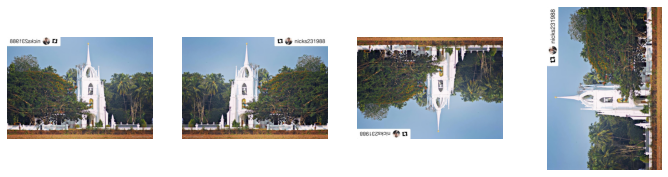

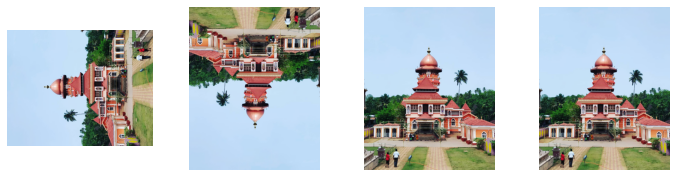

In [ ]:
import os
p='/content/drive/MyDrive/newlandmark'
 
for img in os.listdir(p):
  img = PILImage.create(p+'/'+img)
  _,axs = subplots(1, 4)
  for ax in axs.flatten():
    show_image(DihedralItem()(img, split_idx=0), ctx=ax)

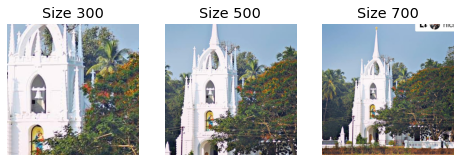

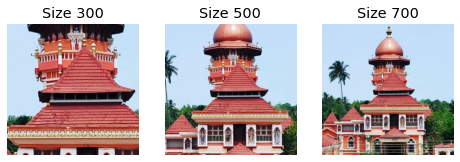

In [ ]:
for img in os.listdir(p):
  img = PILImage.create(p+'/'+img)
  _,axs = plt.subplots(1,3,figsize=(8,4))
  for ax,sz in zip(axs.flatten(), [300, 500, 700]):
    show_image(img.crop_pad(sz), ctx=ax, title=f'Size {sz}');

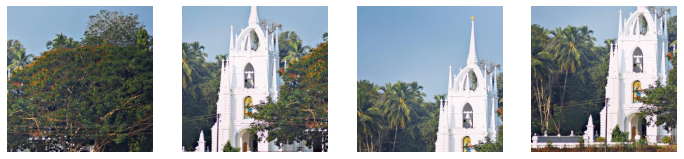

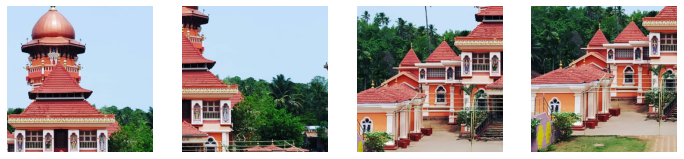

In [ ]:
for img in os.listdir(p):
  img = PILImage.create(p+'/'+img)
  _,axs = subplots(1, 4)
  for ax in axs.flatten():
    show_image(RandomCrop(500)(img, split_idx=0), ctx=ax)



---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Path('/content/drive/MyDrive/landmarks')

In [ ]:
preprocessing = (DihedralItem(), CropPad(150), RandomCrop(100))

In [ ]:
preprocessing = (DihedralItem(), CropPad(150), RandomCrop(100))
dls = ImageDataLoaders.from_folder(path = path, train='train', valid='valid', item_tfms=Resize(224), 
                                   batch_tfms=preprocessing, bs=4, shuffle_train=True) 
dls.show_batch(max_n=5,nrows=1) 

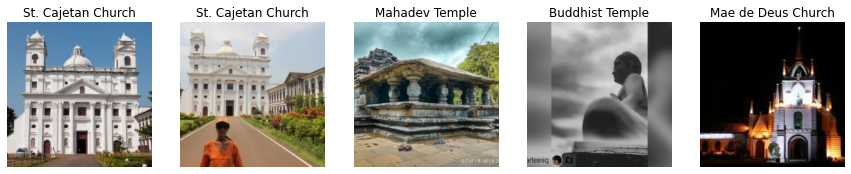

In [ ]:
dls.show_batch(max_n=5,nrows=1)

# **Model training with different architectures**

---


**I. AlexNet**

AlexNet architecture consists of 8 layers: 5 convolutional layers and 3 fully connected layers.

* AlexNet is the deep neural network that was developed by Alex Krizhevsky in 2012.

* Use of the ReLU activation function after convolutional layers and softmax for the output layer.

* Use of Max Pooling instead of Average Pooling.

* Use of Dropout regularization between the fully connected layers.

* Pattern of convolutional layer fed directly to another convolutional layer.






In [ ]:
learn1 = cnn_learner(dls, alexnet, pretrained=True, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
learn1.fine_tune(8)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.362214,0.965521,0.709845,0.290155,02:20


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.560926,0.725874,0.803109,0.196891,00:26
1,1.184257,0.659944,0.808290,0.191710,00:26
2,1.278998,0.620437,0.803109,0.196891,00:26
3,1.294872,0.503987,0.860104,0.139896,00:26
4,1.158267,0.367514,0.875648,0.124352,00:25
5,0.932063,0.402218,0.880829,0.119171,00:25
6,0.816810,0.411984,0.886010,0.113990,00:25
7,0.754210,0.377126,0.891192,0.108808,00:25




---


**II. VGG-19**

VGG-19 architecture consists of 19 layers: 16 convolutional layers, 3 fully connected layers.

* VGG is a successor of the AlexNet created by Visual Geometry Group at Oxford in the year 2014.

* Use of very small convolutional filters, e.g. 3×3 and 1×1 with a stride of one.

* Use of max pooling with a size of 2×2 and a stride of the same dimensions.

* The importance of stacking convolutional layers together before using a pooling layer to define a block.

* Repetition of the convolutional-pooling block pattern.





In [ ]:
learn2 = cnn_learner(dls, vgg19_bn, metrics=[accuracy, error_rate])

In [ ]:
learn2.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.254756,1.136074,0.347150,00:27


epoch,train_loss,valid_loss,error_rate,time
0,1.235263,0.713486,0.196891,00:31
1,1.180734,0.652497,0.186529,00:31
2,1.232532,0.546871,0.170984,00:31
3,0.994107,0.324389,0.108808,00:31
4,0.753679,0.265763,0.077720,00:31
5,0.641125,0.244023,0.067358,00:31
6,0.574750,0.203164,0.051813,00:31
7,0.513848,0.197987,0.067358,00:31




---
**III. ResNet**

* This model design uses residual blocks that make use of shortcut connections. These are simply connections in the network architecture where the input is kept as-is (not weighted) and passed on to a deeper layer, e.g. skipping the next layer.

* The skip connections in resnet solve the problem of vanishing gradient in deep neural networks by allowing this alternate shortcut path for the gradient to flow through.

* A residual block is a pattern of two convolutional layers with ReLU activation where the output of the block is combined with the input to the block.


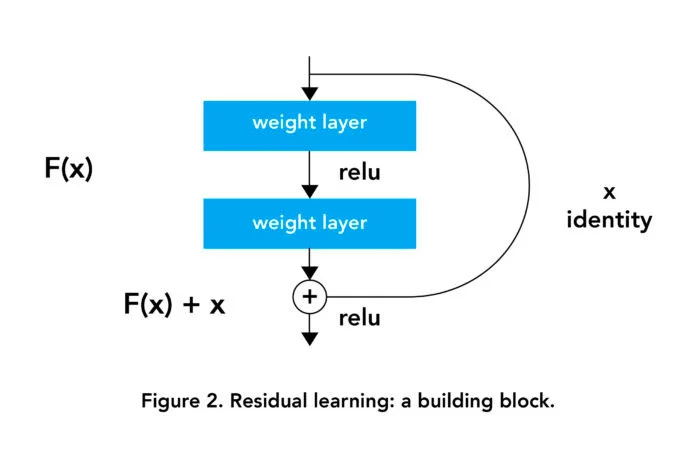








---


**1.** **ResNet-18**

ResNet-18 architecture consists of 17 convolutional layers and 1 fully connected layer.




In [ ]:
learn3 = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn3.fit(n_epoch=200, cbs=EarlyStoppingCallback(monitor='error_rate', patience=2))

epoch,train_loss,valid_loss,error_rate,time
0,1.935812,1.007572,0.316062,00:23
1,1.514712,0.648749,0.212435,00:23
2,1.231489,0.459965,0.150259,00:24
3,1.194033,0.494844,0.129534,00:24
4,1.102426,0.475969,0.150259,00:24
5,0.945457,0.486797,0.145078,00:24


No improvement since epoch 3: early stopping


In [ ]:
learn3.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.284002,1.000490,0.316062,00:24


epoch,train_loss,valid_loss,error_rate,time
0,1.596092,0.812565,0.300518,00:24
1,1.283917,0.410645,0.124352,00:24
2,1.028496,0.305029,0.082902,00:24
3,0.900997,0.344706,0.098446,00:24
4,0.667629,0.306146,0.088083,00:24


In [ ]:
interp1 = ClassificationInterpretation.from_learner(learn3)

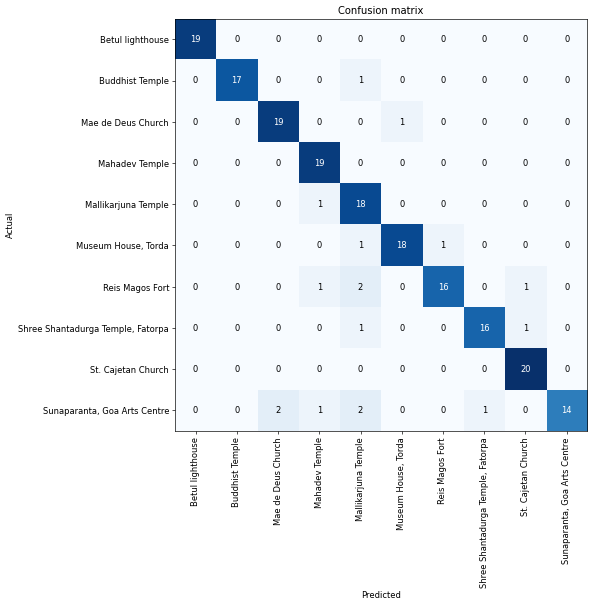

In [ ]:
interp1.plot_confusion_matrix(figsize=(10,10), dpi=60)



---

**2.** **ResNet-50**

ResNet-50 architecture consists of 49 convolutional layers and 1 fully connected layer.


In [ ]:
learn4 = cnn_learner(dls, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn4.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.400943,0.247810,0.077720,07:16


epoch,train_loss,valid_loss,error_rate,time
0,0.325101,0.289324,0.082902,08:48
1,0.552722,0.375351,0.119171,08:49
2,0.635907,0.259844,0.072539,08:53
3,0.436293,0.146263,0.051813,08:55
4,0.370342,0.101991,0.031088,08:57


In [ ]:
interp2 = ClassificationInterpretation.from_learner(learn4)

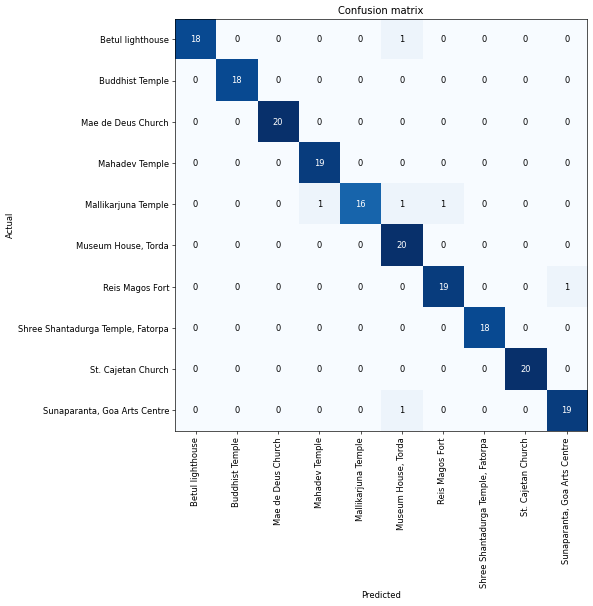

In [ ]:
interp2.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [ ]:
learn4.save('resnet-50-12')

---


**3.** **ResNet-152**

ResNet-152 architecture consists of 151 convolutional layers and 1 fully connected layer.

In [ ]:
learn5 = cnn_learner(dls, resnet152, metrics=error_rate)

In [ ]:
learn5.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.362331,0.163636,0.067358,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.333978,0.215123,0.077720,00:47
1,0.712146,0.384617,0.103627,00:48
2,0.584068,0.218781,0.062176,00:48
3,0.447872,0.178576,0.041451,00:48
4,0.335328,0.221584,0.062176,00:48


In [ ]:
interp3 = ClassificationInterpretation.from_learner(learn5)

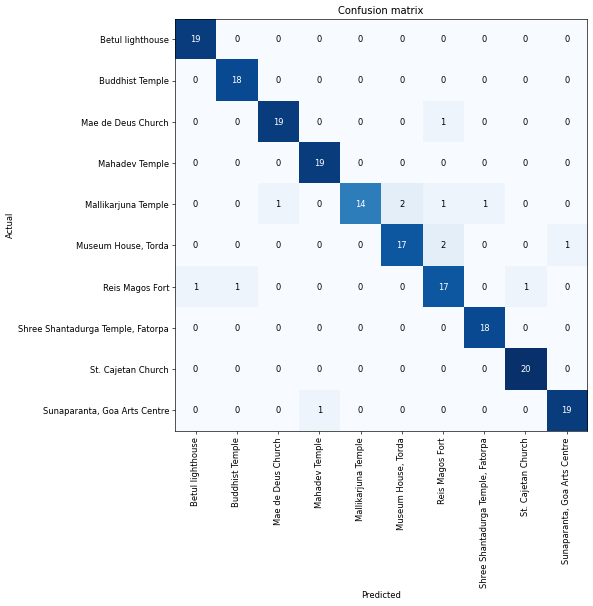

In [ ]:
interp3.plot_confusion_matrix(figsize=(10,10), dpi=60)



---


## **Comparison Table**

|Architecture | Error rate | Accuracy| %|
|-------------|------------|---------|--|
|AlexNet| 0.108808| 0.8912| 89.12|
|Vgg-19 | 0.067358| 0.932| 93.2|
|ResNet-18| 0.088083| 0.912| 91.2|
|ResNet-50|0.031088| 0.969| 96.9|
|ResNet-152|0.062176| 0.9326| 93.26| 






---
# **Testing the model**





In [ ]:
learn4.load('resnet-50-12')

In [ ]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(150,150))
    pred,pred_idx,probs = learn4.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
VBox([widgets.Label('Select Landmark'), btn_upload, btn_run, out_pl, lbl_pred])